In [16]:
import warnings
import itertools
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [17]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [18]:
server = 'DESKTOP-K2IRLC1' 
database = 'DW2023' 
username = 'sa' 
password = '123456'  

driver = 'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+ ';Trusted_Connection=yes'
# create the connection

query = '''SELECT DW.Dimension_Tiempo.FECHA AS FECHA, SUM([CANTIDAD_LLAMADAS]) AS [CANTIDAD]
  FROM DW.Hechos_Atencion INNER JOIN DW.Dimension_Tiempo
  ON DW.Hechos_Atencion.FECHAKEY = DW.Dimension_Tiempo.FECHAKEY
  INNER JOIN DW.Dimension_Clasificador ON DW.Dimension_Clasificador.COD_CLASIFICADORKEY = DW.Hechos_Atencion.COD_CLASIFICADORKEY

  WHERE DW.Dimension_Clasificador.CLASIFICADOR_ID IN (8)

  GROUP BY DW.Dimension_Tiempo.FECHA
  ORDER BY DW.Dimension_Tiempo.FECHA'''

conn = pyodbc.connect(driver)
data = pd.read_sql(query,conn)

data.head()


,FECHA,CANTIDAD
0,2018-01-01,21.0
1,2018-01-02,12.0
2,2018-01-03,13.0
3,2018-01-04,14.0
4,2018-01-05,8.0


In [19]:
data.tail() 

,FECHA,CANTIDAD
2184,2023-12-27,4.0
2185,2023-12-28,8.0
2186,2023-12-29,8.0
2187,2023-12-30,8.0
2188,2023-12-31,13.0


In [21]:
data['FECHA'].min()

Timestamp('2018-01-01 00:00:00')

In [20]:
data['FECHA'].max()

Timestamp('2023-12-31 00:00:00')

In [22]:
data = data.set_index('FECHA')
data.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='FECHA', length=2189, freq=None)

In [23]:
grafic = data['CANTIDAD'].resample('MS').mean()

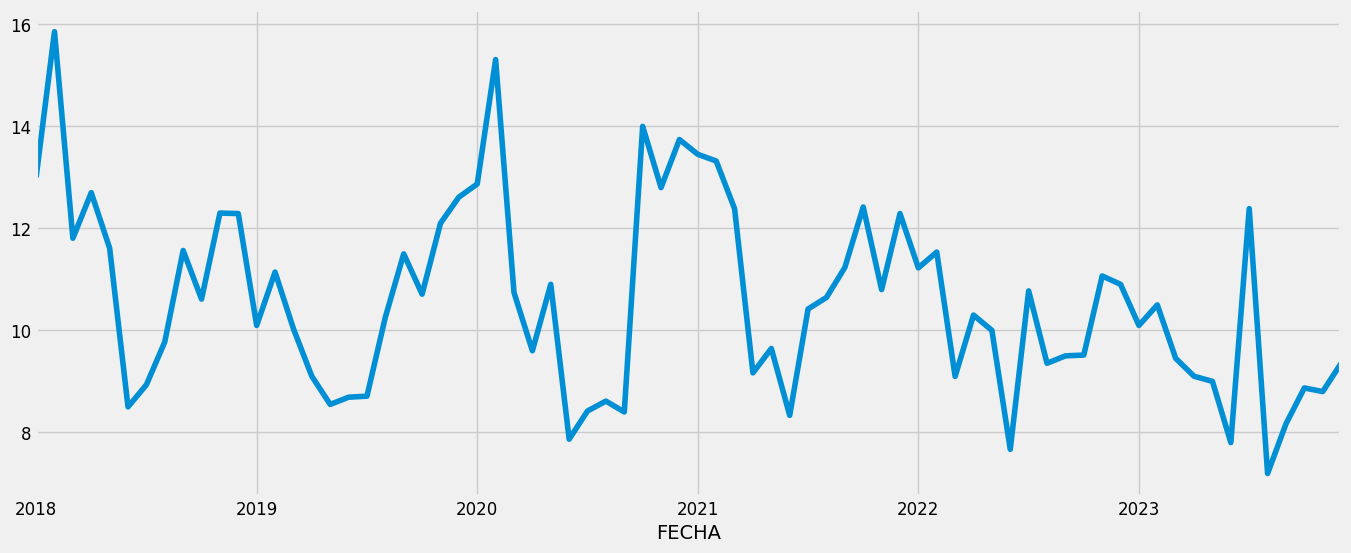

In [24]:
grafic.plot(figsize=(15, 6))
plt.show()

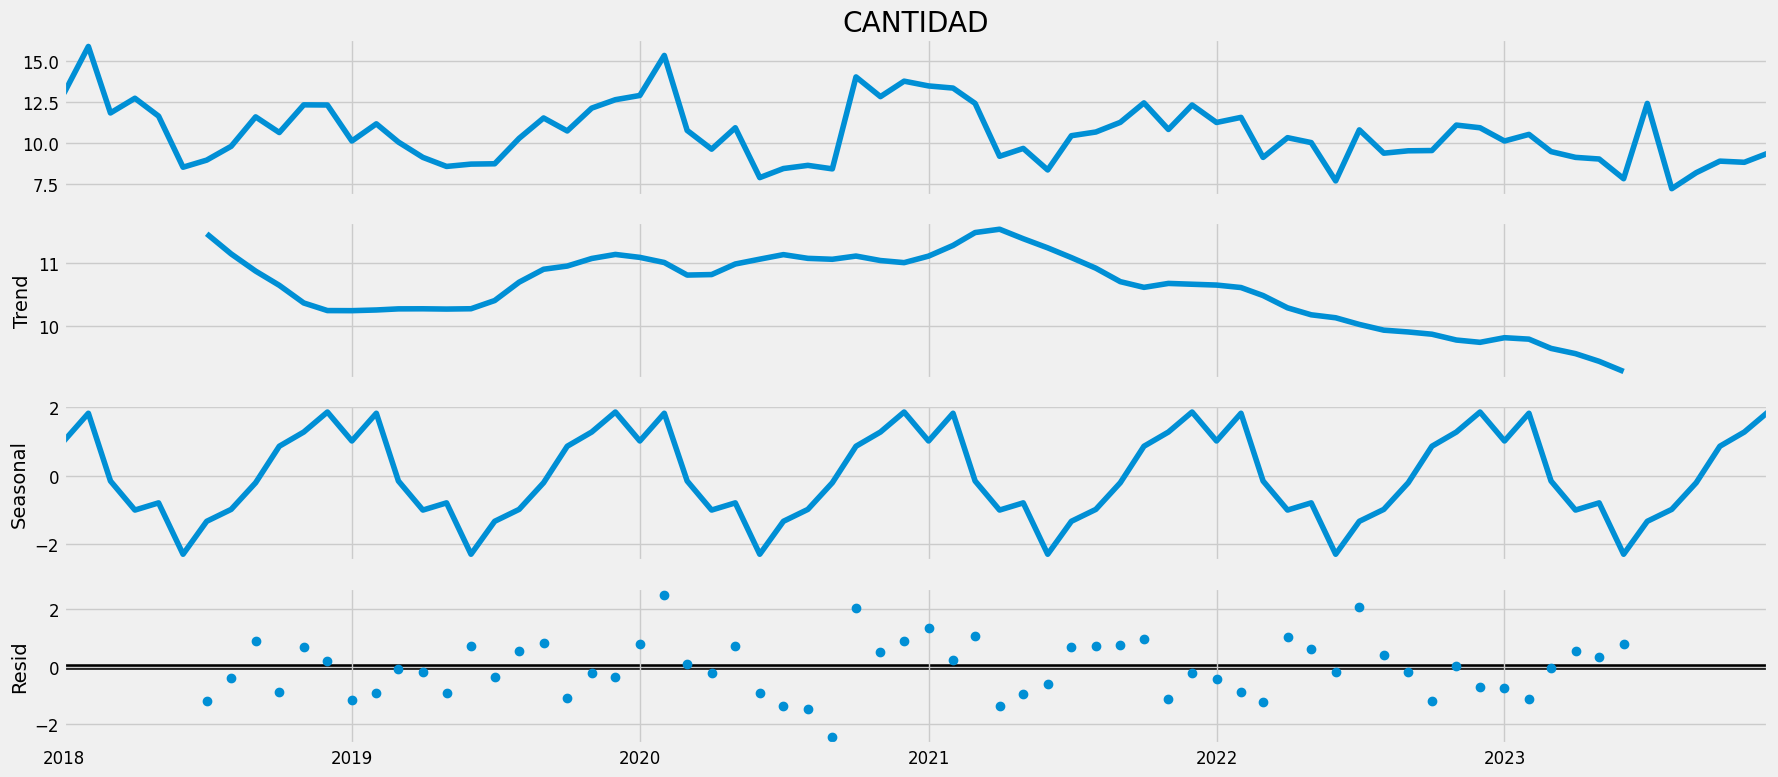

In [25]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(grafic, model='additive')
fig = decomposition.plot()
plt.show()

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(grafic,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:540.0765010196197
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:399.74246356566056
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:240.55738958627526
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:181.90706998114342
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:241.00102197871263
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:227.2038344894073
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:187.01721928581196
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:183.60926820521328
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:451.0586118784758
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:338.08344291731805
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:225.2248163472256
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:174.17948816671958
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:235.0898470810065
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:226.6041803304187
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:184.3032082689436
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:177.2564113197916
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:283.9390629806459
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:231.5922013220486
AR

In [30]:
mod = sm.tsa.statespace.SARIMAX(grafic,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2111      0.201      1.050      0.294      -0.183       0.605
ma.L1         -0.8953      0.127     -7.022      0.000      -1.145      -0.645
ar.S.L12      -0.4741      0.219     -2.168      0.030      -0.903      -0.045
ma.S.L12       0.1730      0.312      0.555      0.579      -0.438       0.784
sigma2         2.2464      0.573      3.918      0.000       1.123       3.370


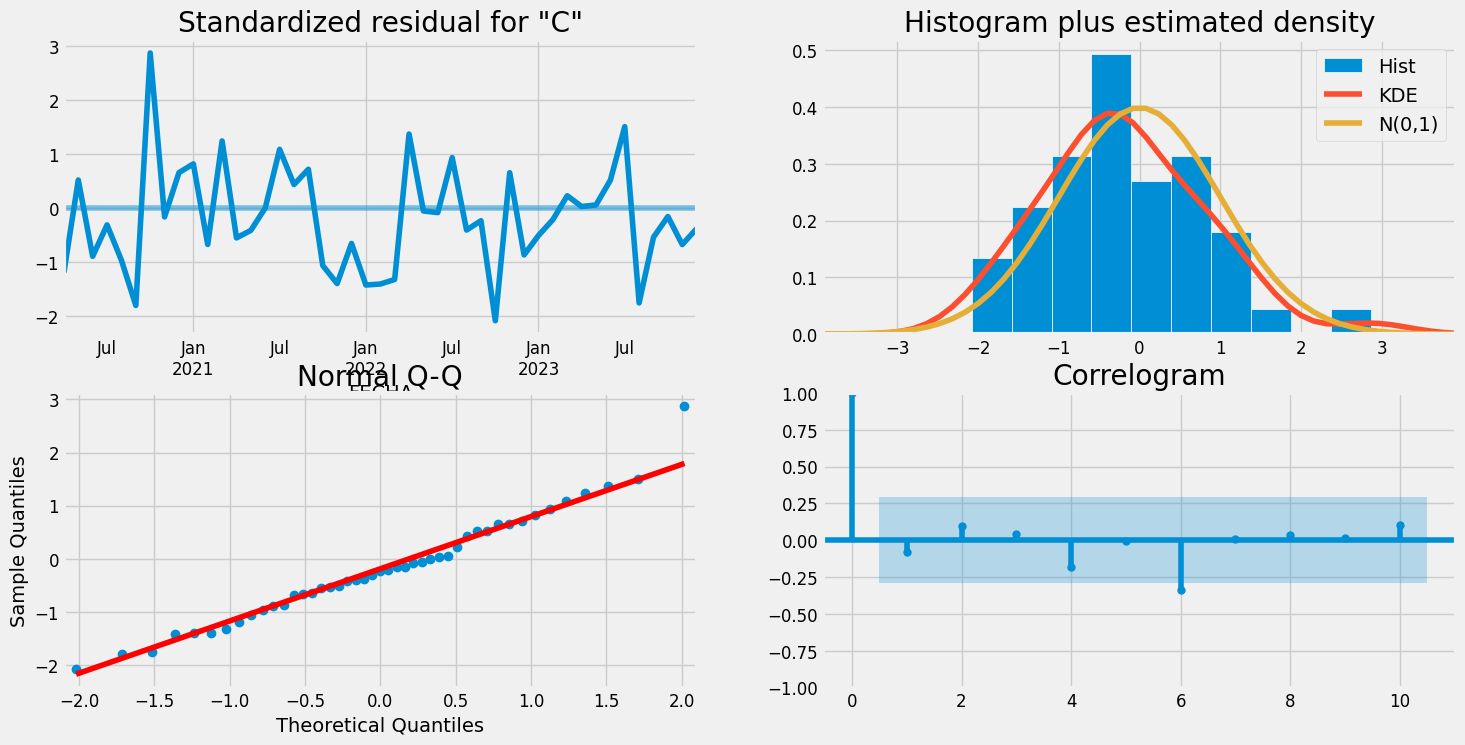

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

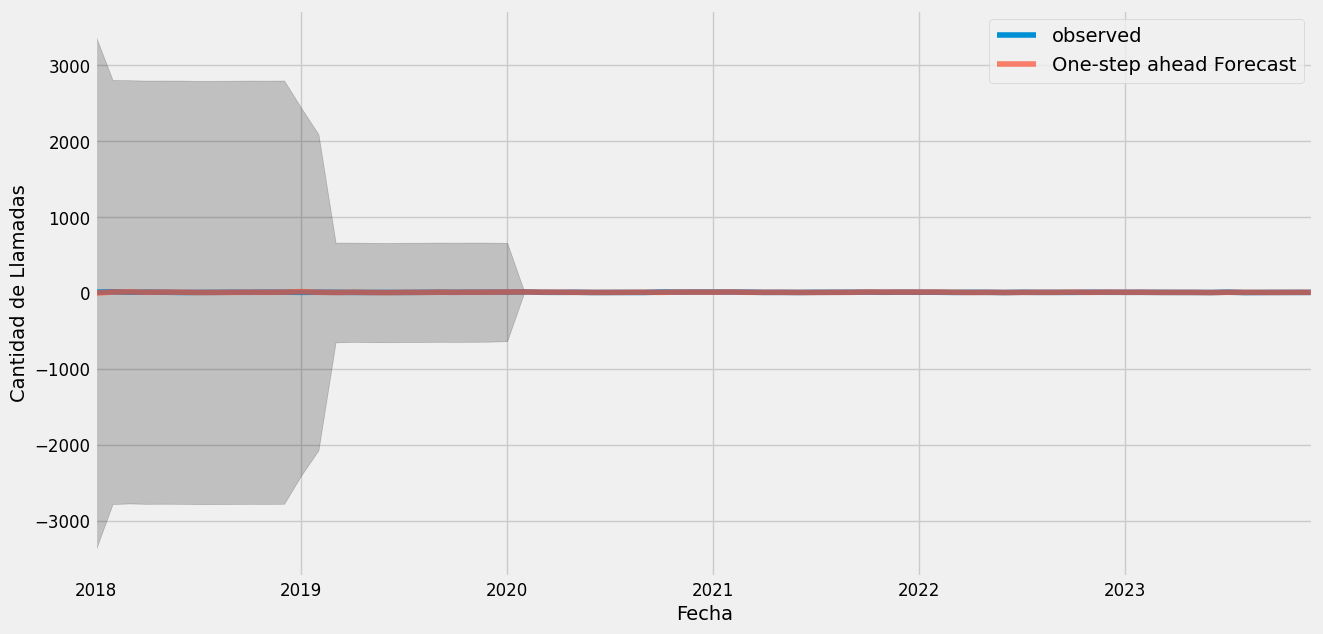

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = grafic['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')
plt.legend()

plt.show()

In [36]:
y_forecasted = pred.predicted_mean
y_truth = grafic['2021-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.85


In [37]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.36


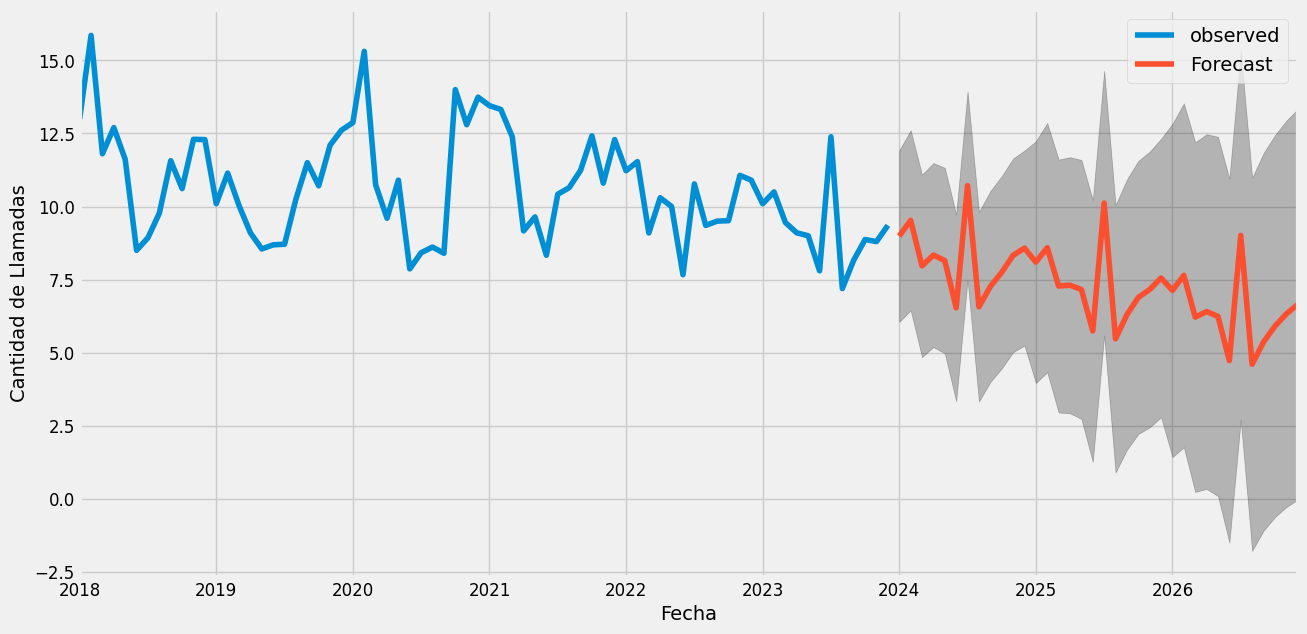

In [38]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = grafic.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')

plt.legend()
plt.show()

pred_uc.summary_frame().to_csv("resultadosVG.csv")
